In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
se_df = pd.read_csv('https://grantmlong.com/data/streeteasy_rents_june2016.csv')

In [3]:
se_df

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1964,73060494,2650,1.0,1,686,9,4.0,3,1,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
4996,5686,92994390,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca,All Downtown,Manhattan
4997,9679,7689663,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy,All Downtown,Manhattan
4998,5188,62828354,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West,All Midtown,Manhattan


In [4]:
se_df.isnull().sum()

rental_id           0
building_id         0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
submarket           0
borough             0
dtype: int64

Text(0.5, 0, 'rent')

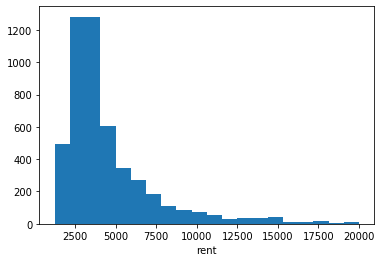

In [5]:
plt.hist(se_df['rent'], bins=20)
plt.xlabel('rent')

In [6]:
se_df.columns

Index(['rental_id', 'building_id', 'rent', 'bedrooms', 'bathrooms',
       'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee',
       'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator',
       'has_dishwasher', 'has_patio', 'has_gym', 'neighborhood', 'submarket',
       'borough'],
      dtype='object')

In [7]:
se_df.dtypes

rental_id             int64
building_id           int64
rent                  int64
bedrooms            float64
bathrooms             int64
size_sqft             int64
min_to_subway         int64
floor               float64
building_age_yrs      int64
no_fee                int64
has_roofdeck          int64
has_washer_dryer      int64
has_doorman           int64
has_elevator          int64
has_dishwasher        int64
has_patio             int64
has_gym               int64
neighborhood         object
submarket            object
borough              object
dtype: object

In [8]:
table=pd.pivot_table(data=se_df, index=se_df['rent'])
print(table)

       bathrooms  bedrooms  building_age_yrs   building_id      floor  \
rent                                                                    
1250    1.000000  0.000000         62.500000  7.160798e+07   2.500000   
1275    1.000000  0.000000         56.000000  7.070025e+07   7.000000   
1299    1.000000  0.000000         56.000000  5.566203e+06   6.500000   
1300    1.000000  0.000000        104.000000  2.697084e+07   2.000000   
1325    1.000000  0.000000         85.000000  3.849634e+07   3.000000   
...          ...       ...               ...           ...        ...   
18500   2.333333  2.333333         65.333333  5.070577e+07  12.333333   
18900   5.000000  4.000000          8.000000  3.329932e+07   8.000000   
19000   2.000000  2.000000          4.500000  5.844103e+07  18.500000   
19950   2.666667  3.000000         32.666667  3.237394e+07  11.333333   
20000   3.000000  3.125000         29.375000  5.407639e+07  31.000000   

       has_dishwasher  has_doorman  has_elevator  

In [9]:
se_df.corr()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
rental_id,1.000000,-0.005627,-0.142801,-0.035035,-0.106741,-0.080647,0.009344,-0.095590,0.047474,0.036605,-0.034081,-0.072351,-0.066153,-0.070506,-0.036664,-0.008090,-0.032547
building_id,-0.005627,1.000000,-0.001235,0.007502,-0.014055,-0.002570,-0.059641,0.015090,-0.036225,-0.019666,0.007928,0.000589,0.027252,0.018778,0.026607,-0.005895,0.016330
rent,-0.142801,-0.001235,1.000000,0.531200,0.733644,0.808784,0.003652,0.272351,-0.122302,-0.091769,0.081286,0.096136,0.099106,0.120822,0.096631,0.058260,0.093737
bedrooms,-0.035035,0.007502,0.531200,1.000000,0.647499,0.738410,0.053365,-0.006468,0.070329,-0.067047,-0.012395,-0.002582,-0.034031,-0.027457,-0.007094,0.003772,-0.018393
bathrooms,-0.106741,-0.014055,0.733644,0.647499,1.000000,0.770593,0.054891,0.145303,-0.103050,-0.052726,0.044597,0.052827,0.044997,0.051410,0.060295,0.057091,0.057221
size_sqft,-0.080647,-0.002570,0.808784,0.738410,0.770593,1.000000,0.024422,0.100234,0.026434,-0.129534,0.038302,0.052746,0.046402,0.060830,0.063051,0.036600,0.047815
min_to_subway,0.009344,-0.059641,0.003652,0.053365,0.054891,0.024422,1.000000,0.029242,-0.138273,0.054977,-0.021765,-0.017840,-0.006722,-0.014314,-0.022058,-0.005652,-0.014924
floor,-0.095590,0.015090,0.272351,-0.006468,0.145303,0.100234,0.029242,1.000000,-0.352757,0.088094,0.079554,0.060379,0.123108,0.109258,0.036979,0.068119,0.089361
building_age_yrs,0.047474,-0.036225,-0.122302,0.070329,-0.103050,0.026434,-0.138273,-0.352757,1.000000,-0.213815,-0.055064,-0.031511,-0.058163,-0.067261,-0.040078,-0.048155,-0.063687
no_fee,0.036605,-0.019666,-0.091769,-0.067047,-0.052726,-0.129534,0.054977,0.088094,-0.213815,1.000000,-0.089593,-0.082366,-0.175022,-0.155638,-0.086081,-0.052192,-0.105797


In [10]:
se_df.shape

(5000, 20)

In [11]:
s=se_df.corr().unstack()
s

rental_id  rental_id         1.000000
           building_id      -0.005627
           rent             -0.142801
           bedrooms         -0.035035
           bathrooms        -0.106741
                               ...   
has_gym    has_doorman       0.648138
           has_elevator      0.659879
           has_dishwasher    0.379161
           has_patio         0.150856
           has_gym           1.000000
Length: 289, dtype: float64

In [12]:
ssort=s.sort_values(kind='quicksort', ascending = False)
ssort['rent'][1:]

size_sqft           0.808784
bathrooms           0.733644
bedrooms            0.531200
floor               0.272351
has_elevator        0.120822
has_doorman         0.099106
has_dishwasher      0.096631
has_washer_dryer    0.096136
has_gym             0.093737
has_roofdeck        0.081286
has_patio           0.058260
min_to_subway       0.003652
building_id        -0.001235
no_fee             -0.091769
building_age_yrs   -0.122302
rental_id          -0.142801
dtype: float64

In [13]:
se_df.describe(include='all')

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,15,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Upper West Side,All Downtown,Manhattan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,579,1229,3539
mean,5526.909400,5.122007e+07,4536.920800,1.395700,1.321600,920.101400,5.079200,10.190200,52.093200,0.429600,0.12860,0.133800,0.228000,0.240000,0.155600,0.045600,0.143800,NaN,NaN,NaN
std,3263.692417,2.802283e+07,2929.838953,0.961018,0.565542,440.150464,5.268897,10.565361,40.224501,0.495069,0.33479,0.340471,0.419585,0.427126,0.362512,0.208637,0.350922,NaN,NaN,NaN
min,1.000000,7.107000e+03,1250.000000,0.000000,0.000000,250.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,2699.750000,2.699811e+07,2750.000000,1.000000,1.000000,633.000000,2.000000,3.000000,12.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,5456.500000,5.069894e+07,3600.000000,1.000000,1.000000,800.000000,4.000000,6.000000,44.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,8306.000000,7.572064e+07,5200.000000,2.000000,2.000000,1094.000000,6.000000,14.000000,89.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [14]:
se_df['rent'].corr(se_df['size_sqft'])

0.8087835060658339

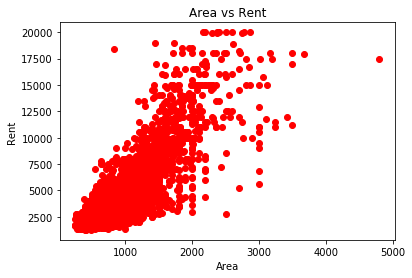

In [15]:
plt.scatter(se_df.size_sqft,se_df.rent, color='r')
plt.title('Area vs Rent')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.show()

### Scatter diagram

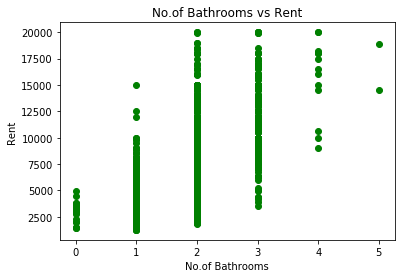

In [16]:
plt.scatter(se_df.bathrooms,se_df.rent, color='g')
plt.title('No.of Bathrooms vs Rent')
plt.xlabel('No.of Bathrooms')
plt.ylabel('Rent')
plt.show()

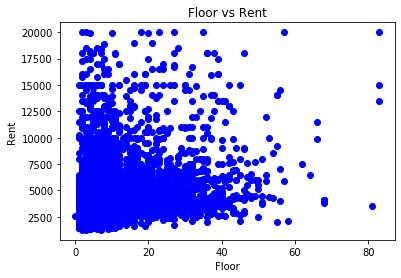

In [17]:
plt.scatter(se_df.floor,se_df.rent, color='b')
plt.title('Floor vs Rent')
plt.xlabel('Floor')
plt.ylabel('Rent')
plt.show()

In [18]:
beta, alpha = np.polyfit(se_df.size_sqft, se_df.rent, 1)
print('beta: %0.3f, alpha: %0.1f.'%(beta, alpha))
print()

beta: 5.384, alpha: -416.6.



In [19]:
print('The slope is:',beta)
print('The intercept is:',alpha)

The slope is: 5.383625863188555
The intercept is: -416.5608937960009


In [20]:
# rent when the area of the house is 700 sqft.
y=beta*700+alpha
print('The expected rent of house when area is 700 sqft:',int(round(y)))

The expected rent of house when area is 700 sqft: 3352


In [21]:
f_eqn = lambda x: beta*x + alpha
rent_fit=f_eqn(se_df.size_sqft)

### Fitting of the line

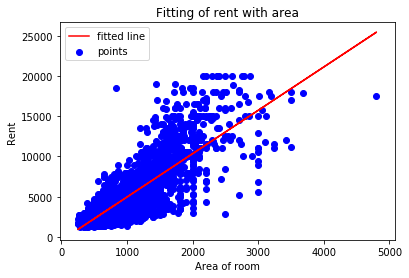

In [22]:
plt.plot(se_df.size_sqft,rent_fit,color='r',alpha=1, label='fitted line')
plt.scatter(se_df.size_sqft,se_df.rent,color='b',label='points')
plt.xlabel('Area of room')
plt.ylabel('Rent')
plt.title('Fitting of rent with area')
plt.legend()
plt.show()

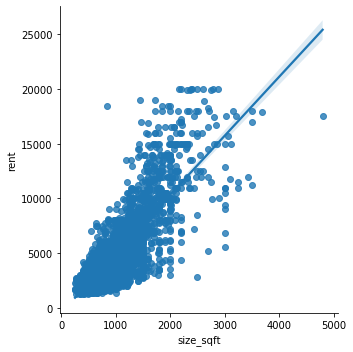

In [23]:
sns.lmplot(x='size_sqft',y='rent',data=se_df)

In [24]:
se_df['rent_predicted']=se_df['rent']*beta+alpha
se_df['rent_residual']=se_df['rent_predicted']-se_df['rent']

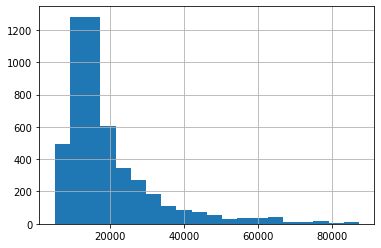

In [25]:
se_df['rent_residual'].hist(bins=20)

# Using Statsmodel 

### Estimating unknown parameters

In [26]:
# add a constant to our existing dataframe for modeling purposes
se_df=sm.add_constant(se_df)
est = sm.OLS(se_df['rent'],se_df[['const','size_sqft']]).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     9453.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:49:43   Log-Likelihood:                -44353.
No. Observations:                5000   AIC:                         8.871e+04
Df Residuals:                    4998   BIC:                         8.872e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -416.5609     56.478     -7.376      0.0

In [27]:
est = sm.OLS(se_df['rent'],se_df[['const','size_sqft','bathrooms','floor','has_doorman']]).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     3151.
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:49:44   Log-Likelihood:                -43859.
No. Observations:                5000   AIC:                         8.773e+04
Df Residuals:                    4995   BIC:                         8.776e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1362.8677     59.283    -22.989      

In [28]:
est = sm.OLS(se_df['rent'],se_df.drop(['neighborhood','submarket','borough','rent','rent_predicted','rent_residual'],axis=1)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     858.1
Date:                Thu, 24 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:49:44   Log-Likelihood:                -43700.
No. Observations:                5000   AIC:                         8.743e+04
Df Residuals:                    4983   BIC:                         8.754e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -777.1793    100.937  

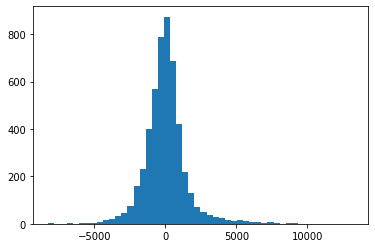

In [29]:
plt.hist(est.resid,bins=50)
plt.show()

In [30]:
# This create a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# Look inside linear regression object
# LinearRegression.<tab>

In [32]:
# Look inside lm object
# lm.<tab>

In [33]:
# Fitting of  independent variables with rent
dependent_vars = ['bedrooms','bathrooms','min_to_subway','floor','building_age_yrs','no_fee','has_roofdeck','has_washer_dryer','has_doorman','has_elevator','has_dishwasher','has_patio','has_gym']
X = se_df[dependent_vars]
lm.fit(X, se_df.rent)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: -515.5040360810199
Number of coefficients: 13


In [35]:
pd.DataFrame(lm.coef_, index = dependent_vars, columns = ['Est. coefficient'])

,Est. coefficient
bedrooms,417.730687
bathrooms,3171.816130
min_to_subway,-22.630204
floor,49.132507
building_age_yrs,-1.488370
no_fee,-344.120712
has_roofdeck,-4.475219
has_washer_dryer,191.475476
has_doorman,-41.004582
has_elevator,400.797299


In [36]:
# First five values of predicted rent
lm.predict(X)[0:5]

array([2629.06488344, 6479.31777692, 3710.34863476, 5994.05257186,
       3764.12600492])

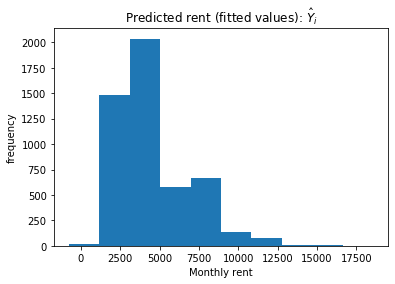

In [37]:
plt.hist(lm.predict(X))
plt.title("Predicted rent (fitted values): $\hat{Y}_i$")
plt.xlabel("Monthly rent")
plt.ylabel("frequency")
plt.show()

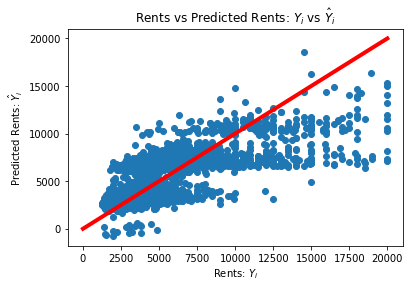

In [38]:
plt.scatter(se_df['rent'],lm.predict(X))
plt.xlabel('Rents: $Y_i$')
plt.ylabel('Predicted Rents: $\hat{Y}_i$')
plt.title('Rents vs Predicted Rents: $Y_i$ vs $\hat{Y}_i$')
plt.plot([0,20000],[0,20000], linewidth = 4, color = 'red')

In [39]:
# sum of squares of rent residuals
print('%0.2f' % np.sum((se_df['rent']-lm.predict(X))**2))

17730479762.04
